In [3]:
from pathlib import Path
import torch
import torchvision
from torchvision.transforms import v2
from torchvision.io import read_image
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

Text(0.5, 1.0, 'Sample train image')

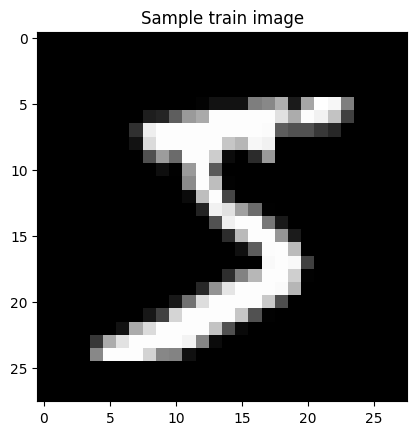

In [4]:
path = Path('C:')
trainset = torchvision.datasets.MNIST(root=path, train=True, download=True, transform=ToTensor())
testset = torchvision.datasets.MNIST(root=path, train=False, download=True, transform=ToTensor())

train_images = []
train_true_vals = []

for data in trainset:
    image, true = data
    train_images.append(image)
    train_true_vals.append(true)

test_images = []
test_true_vals = []

for data in testset:
    image, true = data
    test_images.append(image)
    test_true_vals.append(true)

plt.imshow(train_images[0].view(28,28), cmap='gray')
plt.title('Sample train image')



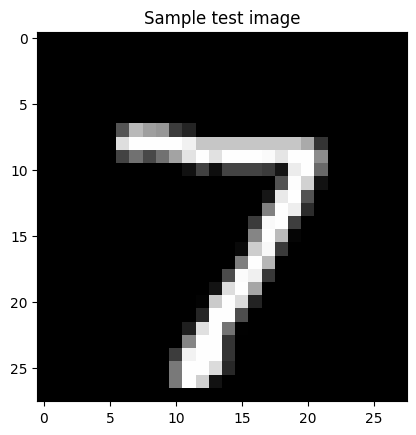

In [5]:

plt.imshow(test_images[0].view(28,28), cmap='gray')
plt.title('Sample test image')

train_loader = torch.utils.data.DataLoader(dataset=trainset, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=testset, shuffle=False)

In [7]:
input_size = 28*28
hidden_units = 15
sample_size = 10
learning_rate = 1e-2            #how much to update models parameters at each batch/epoch. Smaller values yield slow learning speed, while large values may result in unpredictable behavior during training.
batch_size = 100               #the number of data samples propagated through the network before the parameters are updated
epochs = 10                      #the number times to iterate over the dataset

class Net(nn.Module):
    def __init__(self, input_size, hidden_units, sample_size):
        super(Net, self).__init__()
        self.func1 = nn.Linear(input_size,hidden_units)
        self.ReLU = nn.ReLU()
        self.func2 = nn.Linear(hidden_units, sample_size)

    def forward(self, input):
        x = self.func1(input)
        x = self.ReLU(x)
        x = self.func2(x)
        return x

single_hidden_layer = Net(input_size, hidden_units, sample_size)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(single_hidden_layer.parameters(), lr=learning_rate)

accuracies = []
for t in range(epochs):
    for batch, (image, label) in enumerate(train_loader):
        image = image.reshape(-1, input_size)
        prediction = single_hidden_layer(image)
        loss = criterion(prediction, label)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    test_loss, correct = 0, 0
    num_batches = len(train_loader)
    size = len(train_loader.dataset)
    with torch.no_grad():
        for image, label in train_loader:
            image = image.reshape(-1, input_size)
            pred = single_hidden_layer(image)
            test_loss += criterion(pred, label).item()
            _, predicted = torch.max(pred.data, 1)
            correct += (predicted == label).sum().item()
    
    test_loss /= num_batches
    correct /= size
    accuracy = 100*correct
    print("Accuracy: ", accuracy,"%, Avg loss: ",test_loss)
    accuracies.append(accuracy)

KeyboardInterrupt: 

In [6]:
input_size = 28 * 28
hidden_size1 = 500
hidden_size2 = 300
output_size = 10
num_epochs = 40
batch_size = 100
learning_rate = 0.01
weight_decay = 1e-3

class TwoLayerNeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(TwoLayerNeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

model = TwoLayerNeuralNet(input_size, hidden_size1, hidden_size2, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

def calculate_accuracy(loader, model):
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in loader:
            images = images.reshape(-1, 28*28)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

train_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    accuracy = calculate_accuracy(test_loader, model)
    test_accuracies.append(accuracy)
    
    print("Epoch [" + str(epoch + 1) + "/" + str(num_epochs) + "], Loss: " + str(train_loss) + ", Validation Accuracy: " + str(accuracy) + "%")

KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (40,) and (2,)

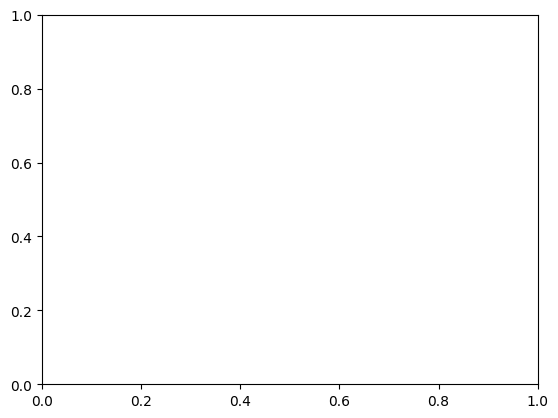

In [7]:

plt.plot(range(1, num_epochs + 1), test_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy over Epochs for Two Hidden Layers')
plt.legend()
plt.show()
plt.savefig('p3.png')


In [9]:
num_epochs = 40
batch_size = 100
learning_rate = 0.1
weight_decay = 1e-3

# Define the Convolutional Neural Network
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # First convolutional layer (output channels = 32,  kernel size = 3x3)
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Second convolutional layer (input channels = 32, output channels = 64, kernel size = 3x3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Fully connected layer (after flattening the 64 feature maps of size 7x7)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        
        # Output layer (128 to 10 classes)
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool2(x)
        
        # Flatten the tensor
        x = x.view(-1, 64 * 7 * 7)
        
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

def calculate_accuracy_CNN(loader, model):
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

train_losses_conv = []
test_accuracies_conv = []
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    train_loss = running_loss / len(train_loader)
    train_losses_conv.append(train_loss)

    # Validation Accuracy
    model.eval()
    accuracy = calculate_accuracy_CNN(test_loader, model)
    test_accuracies_conv.append(accuracy)
    
    print("Epoch [" + str(epoch + 1) + "/" + str(num_epochs) + "], Loss: " + str(train_loss) + ", Validation Accuracy: " + str(accuracy) + "%")


Epoch [1/40], Loss: 2.299281694042359, Validation Accuracy: 9.8%
Epoch [2/40], Loss: 2.3245341828564805, Validation Accuracy: 10.1%


KeyboardInterrupt: 

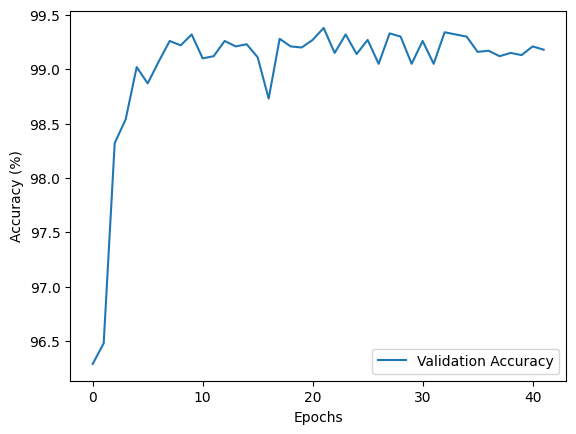

<Figure size 640x480 with 0 Axes>

In [13]:
plt.plot(range(0,42), test_accuracies_conv, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()
plt.savefig('p4.png')